In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt
from astropy    import units  as u

from common import hallmark as hm
from common import io_ipole as io
from common import viz
from common import dalt
from common import mockservation as ms

In [2]:
pf = hm.ParaFrame(
    'test/ipole_86GHz/{mag}a{aspin:g}_w{window:d}/img_s{snapshot:d}_Rh{Rhigh:d}_i{inc:d}.h5'
)

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

inc [10 30 50 70]
window [1]
mag ['M']
Rhigh [  1  10  40 160]
aspin [0.]
snapshot [1000]


In [3]:
sel = pf(inc=70)
display(sel)

,path,mag,aspin,window,snapshot,Rhigh,inc
3,test/ipole_86GHz/Ma0_w1/img_s01000_Rh10_i70.h5,M,0.0,1,1000,10,70
7,test/ipole_86GHz/Ma0_w1/img_s01000_Rh160_i70.h5,M,0.0,1,1000,160,70
11,test/ipole_86GHz/Ma0_w1/img_s01000_Rh1_i70.h5,M,0.0,1,1000,1,70
15,test/ipole_86GHz/Ma0_w1/img_s01000_Rh40_i70.h5,M,0.0,1,1000,40,70


In [4]:
imgs = io.load_mov(sel.path)
meta = imgs.meta

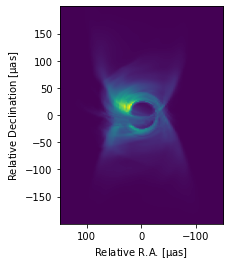

In [5]:
ax = viz.show(imgs, s=0)

In [6]:
vis0 = ms.mockserve(imgs, N=[200, 300])
vis1 = ms.mockserve(imgs, N=[400, 600])
vis2 = ms.mockserve(imgs, N=[800,1200])

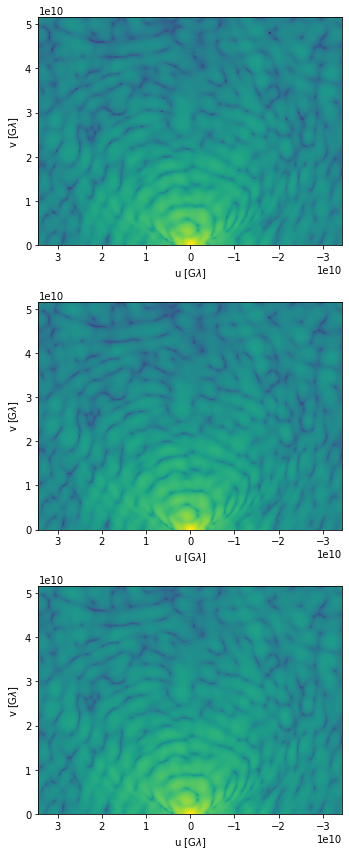

In [8]:
def f(v):
    return np.log(abs(v).value)

fig, axes = plt.subplots(3,1, figsize=(12,12))

viz.show(vis0, s=0, f=f, ax=axes[0])
viz.show(vis1, s=0, f=f, ax=axes[1])
viz.show(vis2, s=0, f=f, ax=axes[2])

fig.tight_layout()

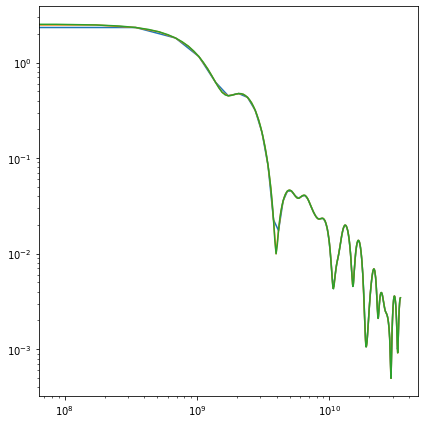

In [23]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

U = vis0.uvd[0]
U = np.linspace(-U/2, U/2, vis0.shape[-2], endpoint=False)
ax.loglog(U, abs(vis0[0,:,0]))

U = vis1.uvd[0]
U = np.linspace(-U/2, U/2, vis1.shape[-2], endpoint=False)
ax.loglog(U, abs(vis1[0,:,0]))

U = vis2.uvd[0]
U = np.linspace(-U/2, U/2, vis2.shape[-2], endpoint=False)
ax.loglog(U, abs(vis2[0,:,0]))

fig.tight_layout()



(4, 128, 128) -599.999436396179 599.999436396179


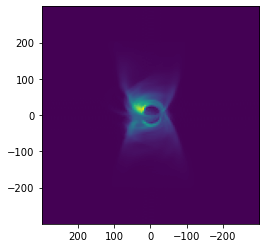

In [10]:
U, V = vis0.uvd
imgs0, width, height = ms.downifft(vis0, U, V, N=128)

width  *= u.rad.to(u.uas)
height *= u.rad.to(u.uas)

print(imgs0.shape, width, height)
plt.imshow(imgs0[0,:,:].T, origin='lower', extent=[-width/2,width/2,-height/2,height/2])

(-299.9997181980895, 299.9997181980895)

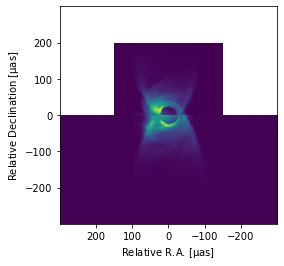

In [11]:
ax = viz.show(imgs, s=0, vmin=0)
ax.imshow(imgs0[0,:,:64].T, origin='lower', extent=[-width/2,width/2,-height/2,0])
ax.set_ylim(-height/2,height/2)